# Load Data

In [425]:
#Import packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

#Plotting parameters
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 24
plt.rcParams['figure.figsize'] = (15,12)
plt.rcParams['axes.grid'] = True
fignum = 0
colorArr = ['b', 'r', 'g', 'k']

In [436]:
#Load data file
data = np.loadtxt("20181001-180018.txt", unpack=True, skiprows=3, delimiter=',')
time = data[0] #in ctime
allTime = (data[0] - data[0][0])/3600. #hours
dataDict = {"Rotor": data[1],
            #"Rotor 2": data[2]
            #"Rotor 3": data[2]
            "YBCO": data[4],
            "50 K Filter": data[5],
            "Copper Tower": data[6],
            #"Empty": data[7],
            #"Empty": data[8],
            "Aperture Tube": data[9],
            #"Unknown": data[10],
            #"Unknown": data[11],
            "50 K Cold Head": data[12],
            "Field Lens": data[13],
            "Lyot": data[1],
            "4 K Cold Head": data[15],
            "50 K Heat Link": data[16],
            "50 K Body 1": data[17],
            "50 K Body 2": data[18],
            "50 K Body 3": data[19],
            "Aperture Lens": data[20],
            "4 K Bottom": data[21],
            "4 K Top": data[22],
            "50 K Bottom": data[23],
            "4 K Heat Link": data[24]}
keys_50K = ["50 K Filter", "Copper Tower", "Rotor", "YBCO", "50 K Body 3", "50 K Body 2", "50 K Body 1", "50 K Bottom", "50 K Heat Link", "50 K Cold Head"]
keys_50K_fit = ["50 K Heat Link", "50 K Cold Head"]
keys_4K  = ["4 K Top", "Field Lens", "4 K Heat Link", "4 K Cold Head", "Aperture Lens", "4 K Bottom"]
keys_4K_fit  = ["4 K Heat Link", "4 K Cold Head"]

#Times at which the voltage was stepped
#ctime values obtained using online calculator
#Initial value taken from temperature logging file
powers = np.array([0, 10, 20, 30]) #W
step = np.array([1.5384420242491591e+09, 1538442060, 1538485263, 1538528466, 1538571668])
stepArgs = [np.argmin(abs(time - step[i])) for i in range(len(step))]
times = [time[stepArgs[i]:stepArgs[i+1]] for i in range(int(len(stepArgs)-1))]
#Set time blocks to hours from the beginning of the test
times = [[(times[i][j] - times[0][0])/3600. for j in range(len(times[i]))] for i in range(len(times))]

# Introduction

This document describes heat load tests taken for the PB2b Optics Tube during Run 8. A Kikusui PMX 35 V, 3 A power supply was stepped at three voltages across a 25 $\Omega$ resistor to produce 10, 20, and 30 W of power on the "sky-side" 50 K Filter. 

# Full Dataset

Below is a plot of the entire run with three voltages steps over 36 hours, divided into 50 K and 4 K.

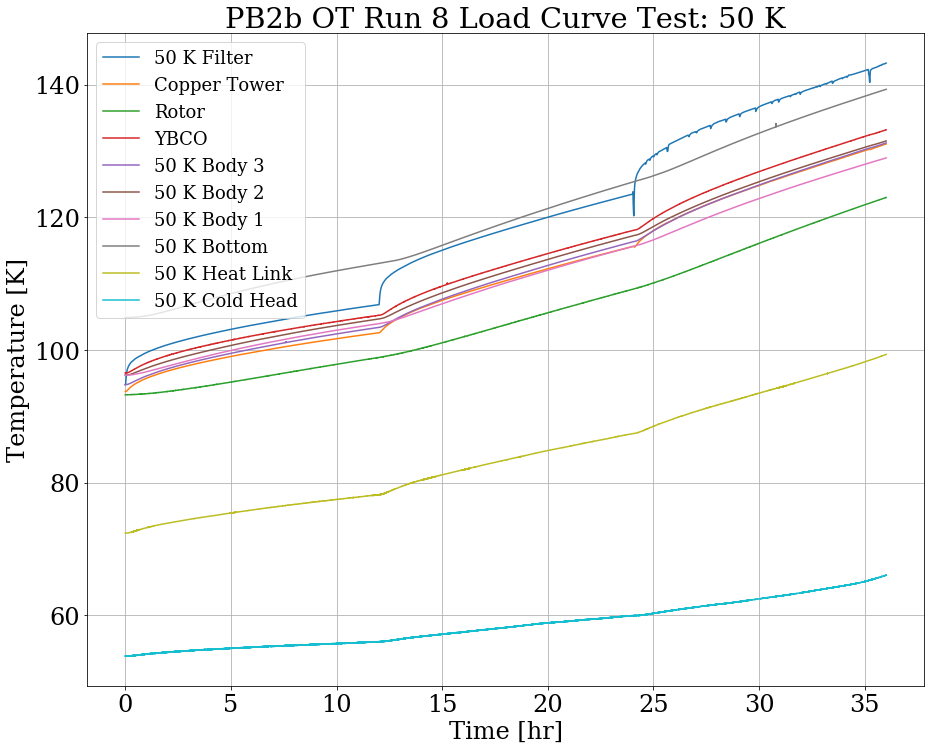

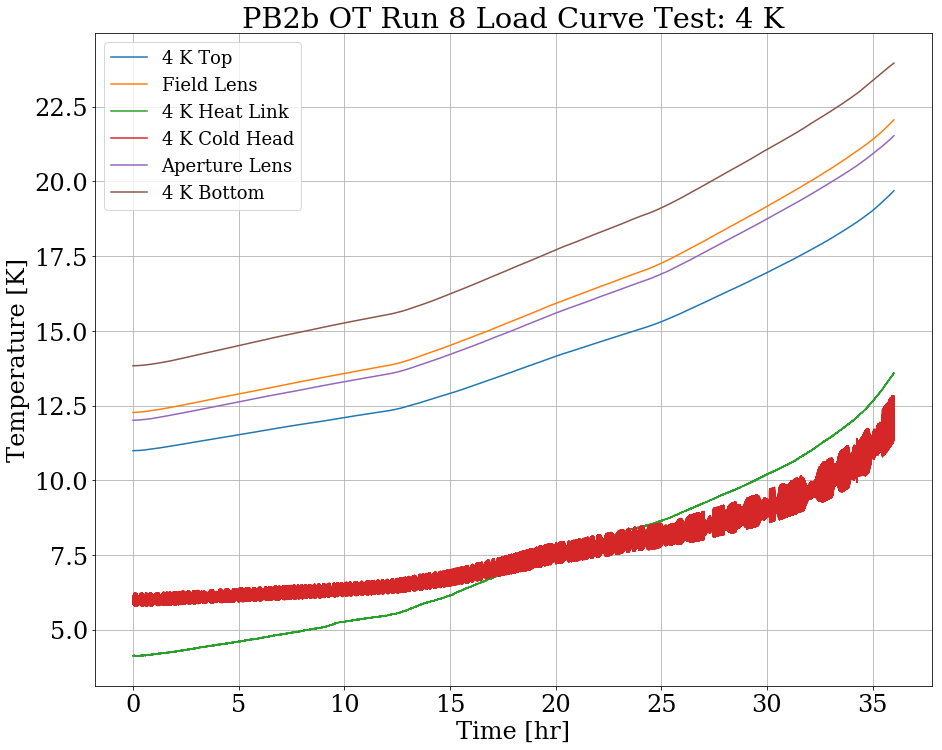

In [437]:
#Plot all 50 K data
plt.figure(0)
for key in keys_50K:
    plt.plot(allTime[:stepArgs[-1]], dataDict[key][:stepArgs[-1]], label=key)
plt.xlabel("Time [hr]")
plt.ylabel("Temperature [K]")
plt.title("PB2b OT Run 8 Load Curve Test: 50 K")
plt.legend(fontsize=18)

#Plot all 4 K data
plt.figure(1)
for key in keys_4K:
    plt.plot(allTime[:stepArgs[-1]], dataDict[key][:stepArgs[-1]], label=key)
plt.xlabel("Time [hr]")
plt.ylabel("Temperature [K]")
plt.title("PB2b OT Run 8 Load Curve Test: 4 K")
plt.legend(fontsize=18)

# Individual Load Curves

Let's break the above plot into the distinct loading regions for analysis.


0 W: 50 K Temperatures
50 K Filter    : 94.7  K
Copper Tower   : 93.7  K
Rotor          : 93.2  K
YBCO           : 96.5  K
50 K Body 3    : 94.8  K
50 K Body 2    : 96.2  K
50 K Body 1    : 96.2  K
50 K Bottom    : 104.9 K
50 K Heat Link : 72.4  K
50 K Cold Head : 53.9  K

10 W: 50 K Temperatures
50 K Filter    : 106.8 K
Copper Tower   : 102.6 K
Rotor          : 98.9  K
YBCO           : 105.2 K
50 K Body 3    : 103.4 K
50 K Body 2    : 104.7 K
50 K Body 1    : 104.0 K
50 K Bottom    : 113.0 K
50 K Heat Link : 78.2  K
50 K Cold Head : 56.0  K

20 W: 50 K Temperatures
50 K Filter    : 123.5 K
Copper Tower   : 115.6 K
Rotor          : 109.1 K
YBCO           : 118.0 K
50 K Body 3    : 116.3 K
50 K Body 2    : 117.2 K
50 K Body 1    : 115.6 K
50 K Bottom    : 125.3 K
50 K Heat Link : 87.4  K
50 K Cold Head : 59.9  K

30 W: 50 K Temperatures
50 K Filter    : 143.2 K
Copper Tower   : 131.0 K
Rotor          : 123.0 K
YBCO           : 133.2 K
50 K Body 3    : 131.2 K
50 K Body 2    : 131.5 K
5

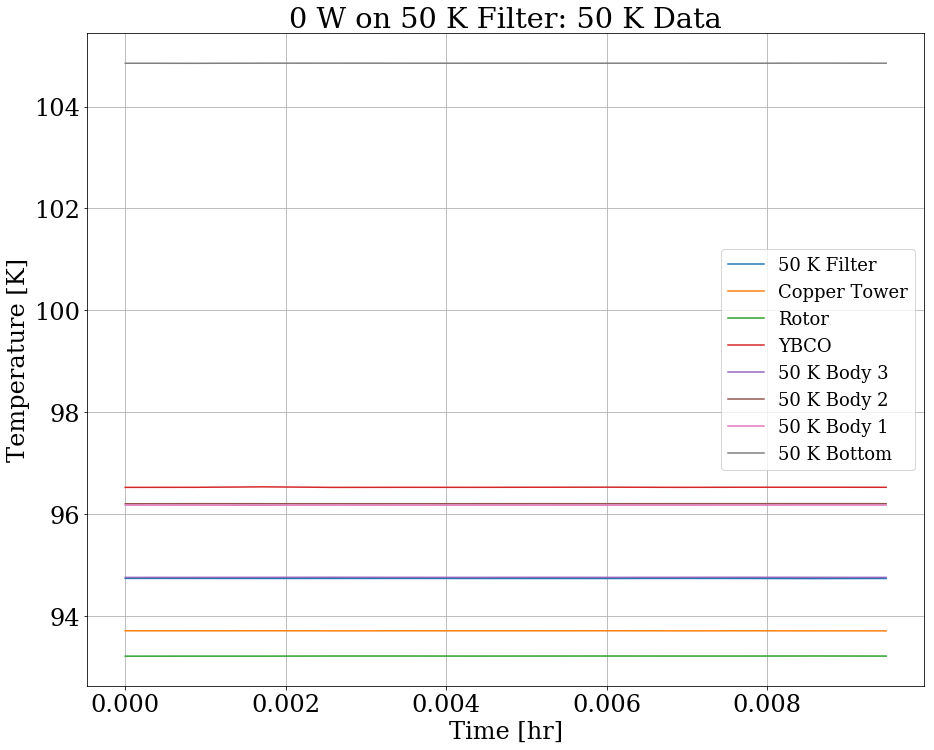

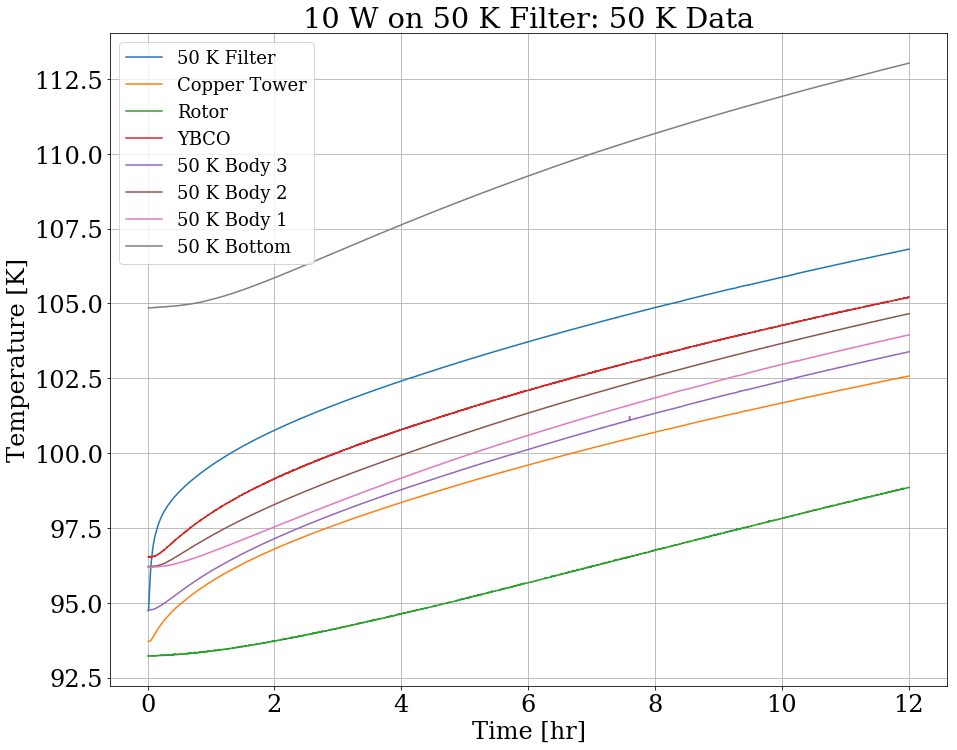

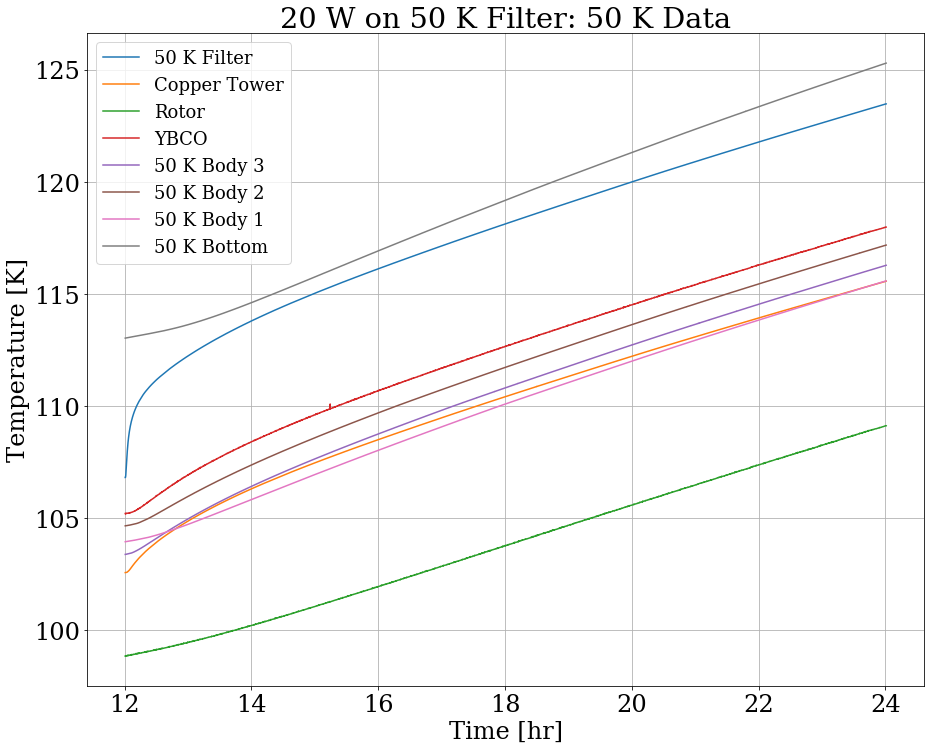

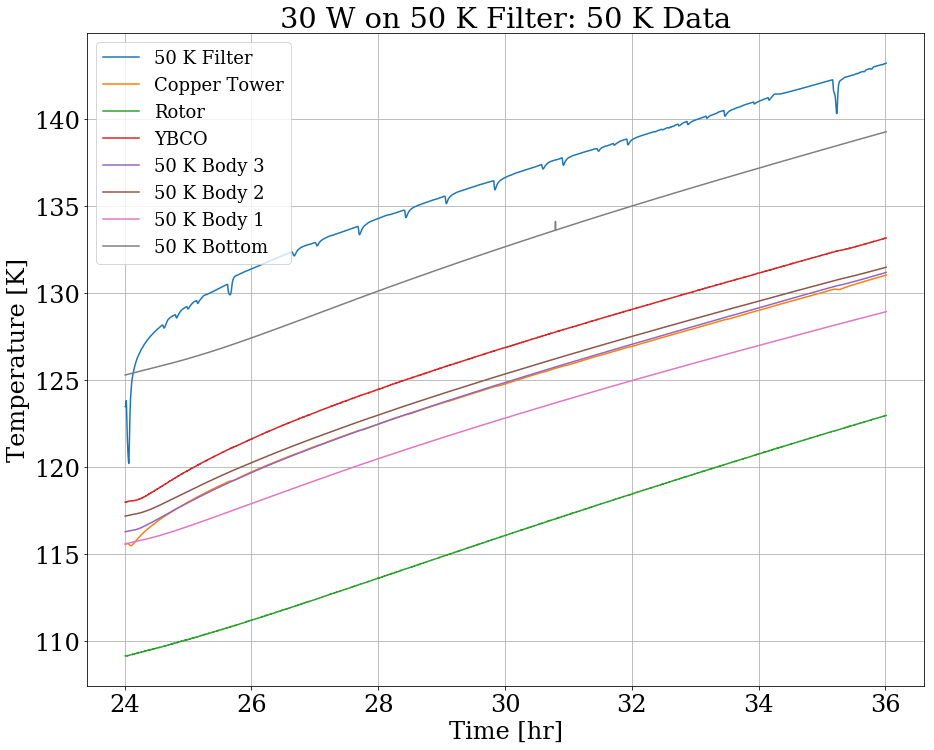

In [438]:
#Plot the 50 K data
figNum = 0
for i in range(len(powers)):
    plt.figure(figNum)
    #Print the temperature values and plot
    print ("\n%d W: 50 K Temperatures" % (powers[i]))
    for key in keys_50K:
        if not key in keys_50K_fit:
            plt.plot(times[i], dataDict[key][stepArgs[i]:stepArgs[i+1]], label=key)
        print ("%-15s: %-5.1f K" % (key, dataDict[key][stepArgs[i+1]-1])) 
    plt.xlabel("Time [hr]")
    plt.ylabel("Temperature [K]")
    plt.title("%d W on 50 K Filter: 50 K Data" % (powers[i]))
    plt.legend(fontsize=18)
    figNum += 1


0 W: 4 K Temperatures
4 K Top        : 11.0  K
Field Lens     : 12.3  K
4 K Heat Link  : 4.1   K
4 K Cold Head  : 6.1   K
Aperture Lens  : 12.0  K
4 K Bottom     : 13.8  K

10 W: 4 K Temperatures
4 K Top        : 12.3  K
Field Lens     : 13.8  K
4 K Heat Link  : 5.5   K
4 K Cold Head  : 6.7   K
Aperture Lens  : 13.5  K
4 K Bottom     : 15.5  K

20 W: 4 K Temperatures
4 K Top        : 15.1  K
Field Lens     : 17.0  K
4 K Heat Link  : 8.4   K
4 K Cold Head  : 8.4   K
Aperture Lens  : 16.6  K
4 K Bottom     : 18.8  K

30 W: 4 K Temperatures
4 K Top        : 19.7  K
Field Lens     : 22.1  K
4 K Heat Link  : 13.6  K
4 K Cold Head  : 11.4  K
Aperture Lens  : 21.5  K
4 K Bottom     : 24.0  K


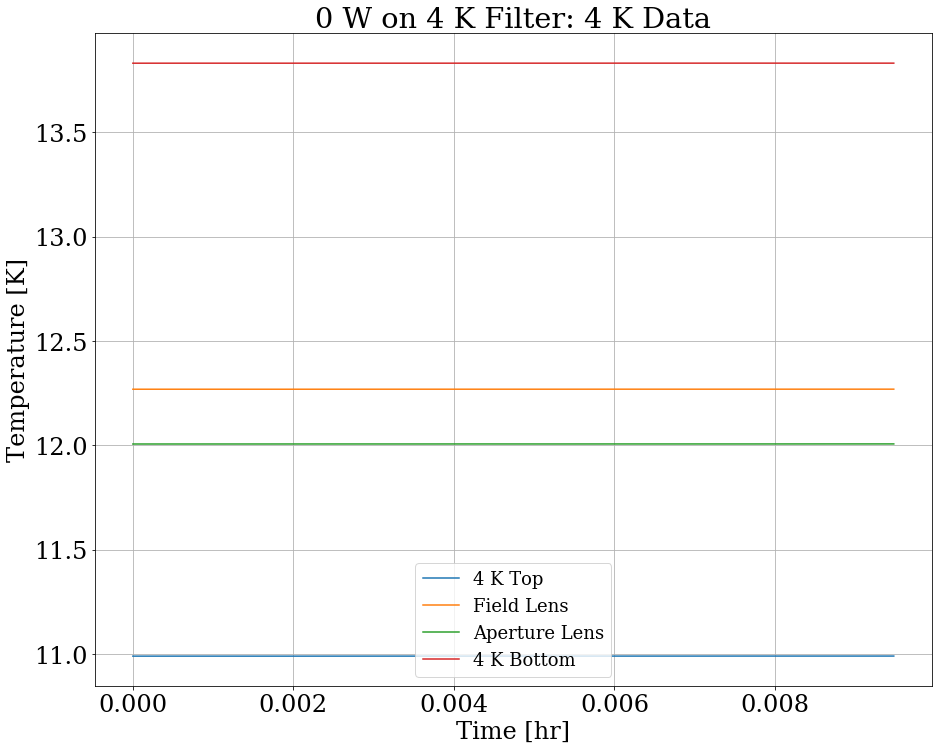

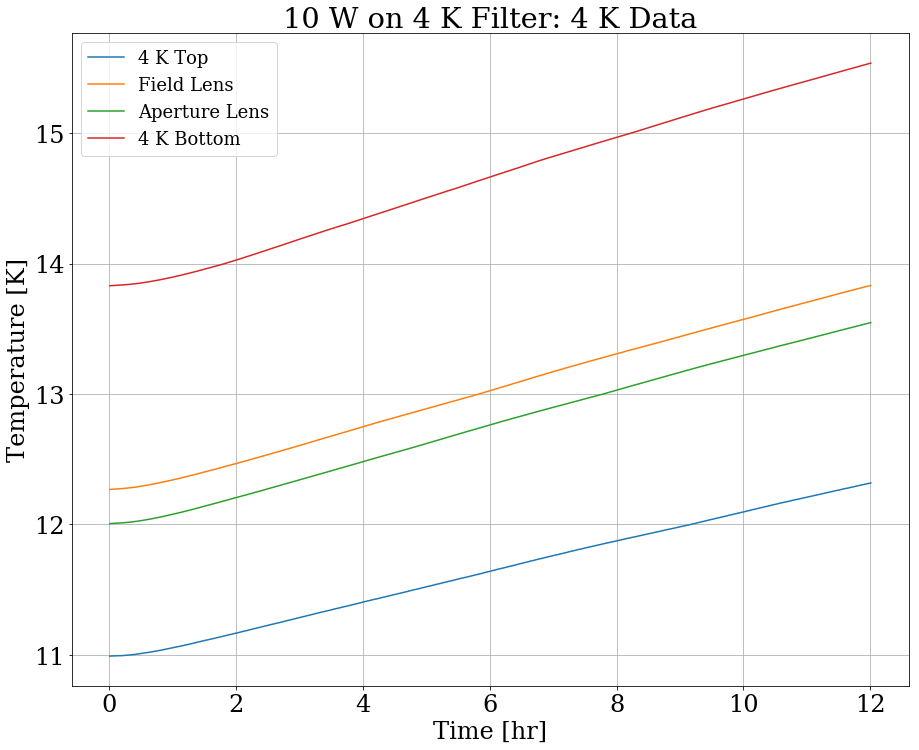

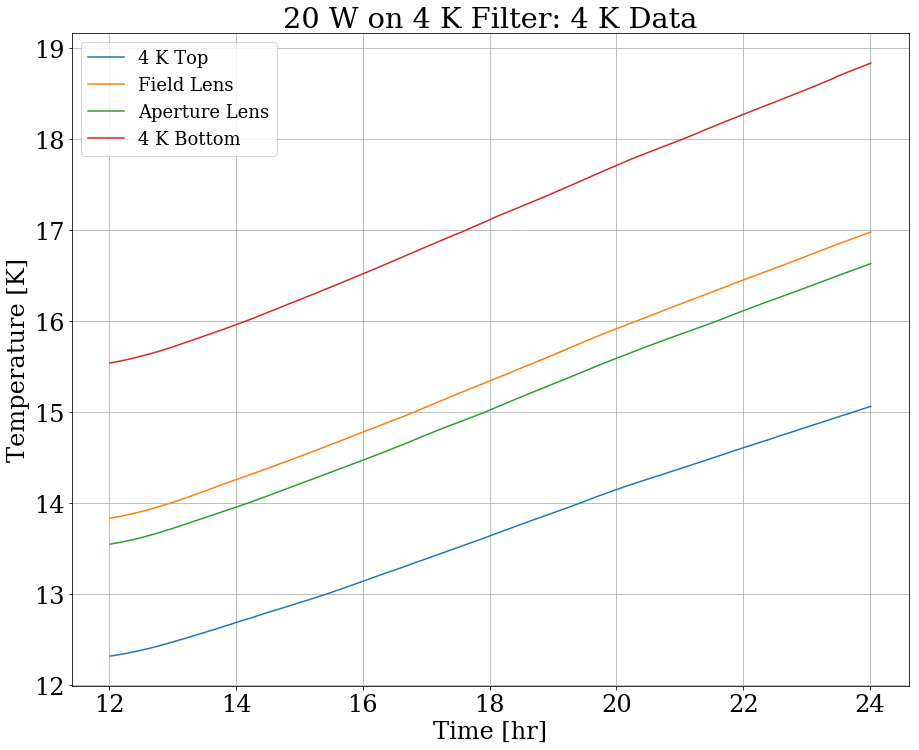

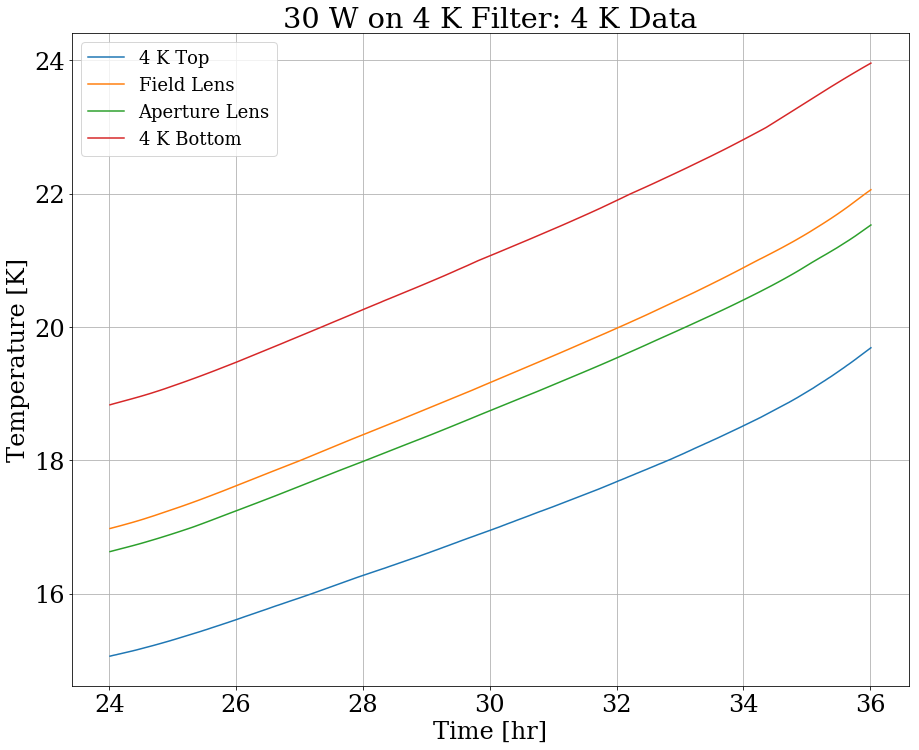

In [439]:
#Plot the 4 K data
figNum = 0
for i in range(len(powers)):
    plt.figure(figNum)
    #Print the temperature values and plot
    print ("\n%d W: 4 K Temperatures" % (powers[i]))
    for key in keys_4K:
        if not key in keys_4K_fit:
            plt.plot(times[i], dataDict[key][stepArgs[i]:stepArgs[i+1]], label=key)
        print ("%-15s: %-5.1f K" % (key, dataDict[key][stepArgs[i+1]-1])) 
    plt.xlabel("Time [hr]")
    plt.ylabel("Temperature [K]")
    plt.title("%d W on 4 K Filter: 4 K Data" % (powers[i]))
    plt.legend(fontsize=18)
    figNum += 1

## Final Cold Head Temperature Extrapolation

We would have to wait several days until the cold head equilibrates due to the large thermal mass of the 4 K and 50 K tubes. Therefore, we will take the data for the 50 K cold head, 4 K cold head, 50 K heat link, and 4 K heat link and extrapolate them to their asymptotic value.

In [440]:
#Define function to fit load curve data to
def fitFunc(x, p1, p2, p3, p4):
    arg = p2*x + p3
    if not np.isscalar(arg):
        arg[np.where(arg <= 0)] = 1.e-5
    else:
        if arg <= 0: arg = 1
    #return (p1 - x*p5)*np.log(arg) + p4
    return p1/(1 - np.exp(arg)) + p4


10 W Extrapolated Temperature:
50 K Heat Link : 86.7  K
50 K Cold Head : 58.3  K

20 W Extrapolated Temperature:
50 K Heat Link : 108.3 K
50 K Cold Head : 72.6  K

30 W Extrapolated Temperature:
50 K Heat Link : 175.0 K


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

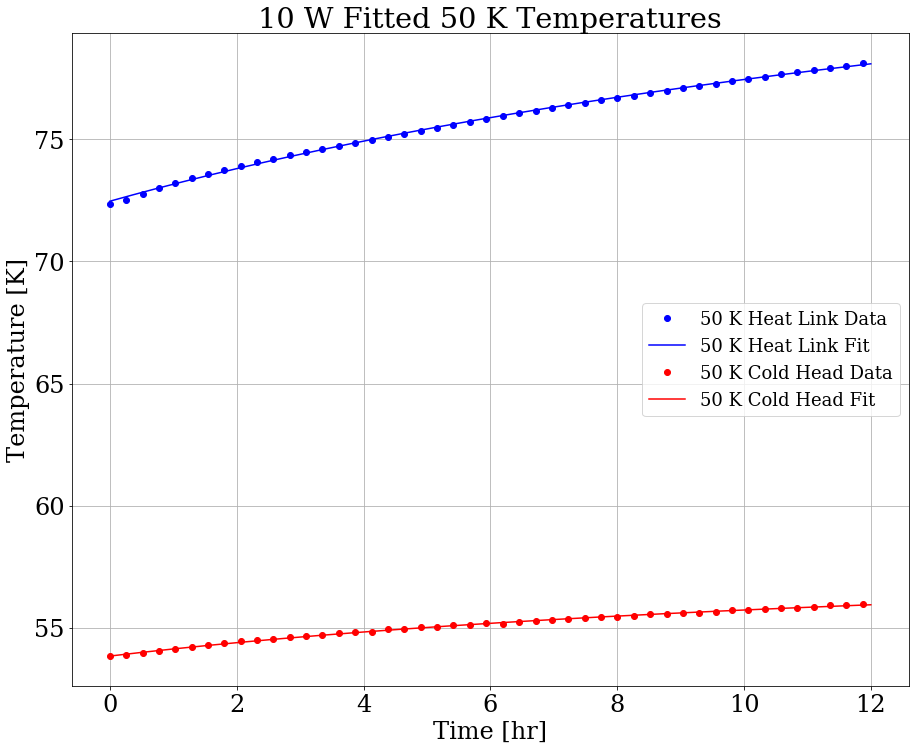

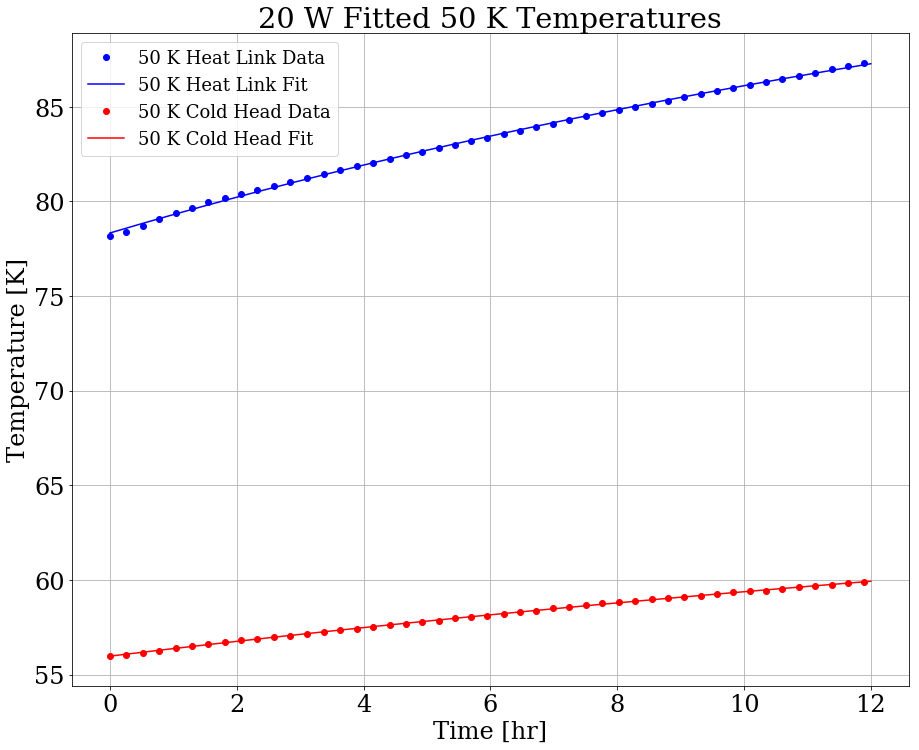

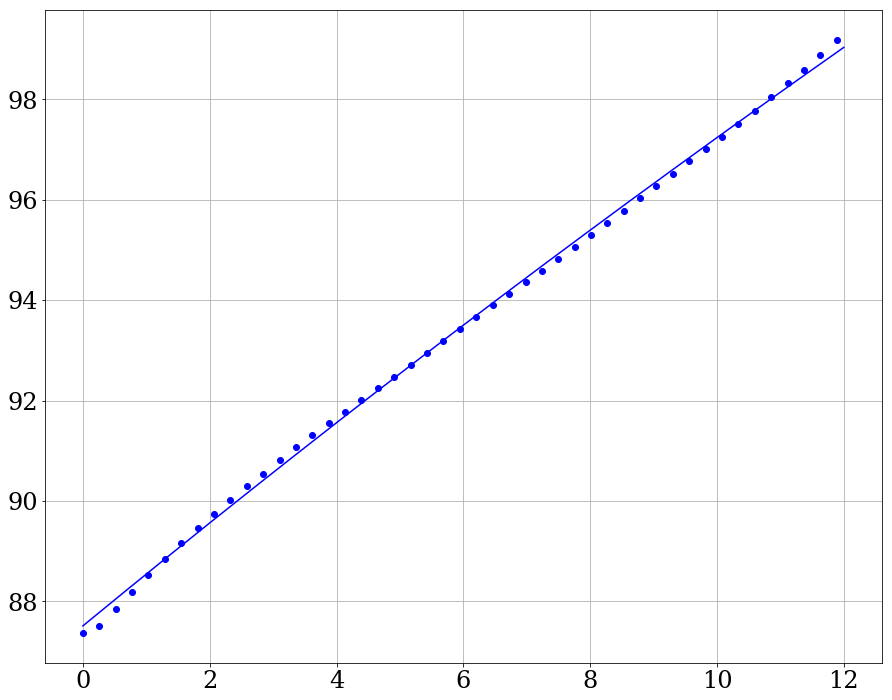

In [450]:
#Extrapolate 50 K data using exponential fit
figNum = 0
ds = 300 #Downsample data for plotting
for i in range(1, len(powers)):
    plt.figure(figNum)
    print ("\n%d W Extrapolated Temperature:" % (powers[i]))
    for j in range(len(keys_50K_fit)):
        key = keys_50K_fit[j]
        x = times[i]
        #startTime = x[0]
        x = x - x[0] #Start the time at zero
        y = dataDict[key][stepArgs[i]:stepArgs[i+1]]
        #x = x[::ds]
        #y = y[::ds]
        #Guess initial parameters
        p0 = [1.e-3, 1.e-6, 1.e-6, y[-1]]
        #Run the fit
        popt, pcov = opt.curve_fit(fitFunc, x, y, p0=p0)
        #print (popt)
        #poptArr.append(popt)
        print ("%-15s: %-5.1f K" % (key, fitFunc(200, *popt)))
        #Plot the fitted data
        xArr = x[::ds]
        yArr = y[::ds]
        #xArr = x
        #yArr = y
        xFit = np.linspace(x[0], x[-1], 200)
        yFit = fitFunc(xFit, *popt)
        plt.plot(xArr, yArr, linewidth=0, marker='o', color=colorArr[j], label=key+' Data')
        plt.plot(xFit, yFit, label=key+' Fit', color=colorArr[j])
    plt.xlabel("Time [hr]")
    plt.ylabel("Temperature [K]")
    plt.title("%d W Fitted 50 K Temperatures" % (powers[i]))
    plt.legend(fontsize=18)
    figNum += 1

In [444]:
#Extrapolate 4 K data using exponential fit
figNum = 0
ds = 300 #Downsample data for plotting
for i in range(1, len(powers)):
    plt.figure(figNum)
    print ("\n%d W Extrapolated Temperature:" % (powers[i]))
    for j in range(len(keys_4K_fit)):
        key = keys_4K_fit[j]
        x = times[i]
        #startTime = x[0]
        x = x - x[0] #Start the time at zero
        y = dataDict[key][stepArgs[i]:stepArgs[i+1]]
        #x = x[::ds]
        #y = y[::ds]
        #Guess initial parameters
        p0 = [1.e-3, 1.e-10, 1.e-10, y[-1]]
        #Run the fit
        popt, pcov = opt.curve_fit(fitFunc, x, y, p0=p0)
        print (popt)
        #poptArr.append(popt)
        print ("%-15s: %-5.1f K" % (key, fitFunc(200, *popt)))
        #Plot the fitted data
        xArr = x[::ds]
        yArr = y[::ds]
        #xArr = x
        #yArr = y
        xFit = np.linspace(x[0], x[-1], 200)
        yFit = fitFunc(xFit, *popt)
        plt.plot(xArr, yArr, linewidth=0, marker='o', color=colorArr[j], label=key+' Data')
        plt.plot(xFit, yFit, label=key+' Fit', color=colorArr[j])
    plt.xlabel("Time [hr]")
    plt.ylabel("Temperature [K]")
    plt.title("%d W Fitted 4 K Temperatures" % (powers[i]))
    plt.legend(fontsize=18)
    figNum += 1


10 W Extrapolated Temperature:


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

<Figure size 1080x864 with 0 Axes>

# 50 K Thermal circuit

Solve the thermal circuit to back out the thermal conduction across various thermal interfaces

In [ ]:
#Thermal elements
elements = ["50 K Filter", "Copper Tower", "Rotor", "YBCO", "50 K Body 3", "50 K Heat Link", "50 K Cold Head", "50 K Body 2", "50 K Body 1", "50 K Bottom"]
